Question 1

Classification Decision Tree are particularly useful in classification problems(predicting discrete class); especially when the relationship between variables is non-linear or complex(it can also handle both numerical and categorical data). Some examples are: Medical Diagnosis(predicting the presence or absense of a disease), Credit Scoring(classifying individuals as low or high credit risk), and Fraud Detection(Detecting fraudulent transactions by classifying transaction data).

As mentioned before, classification decision trees are used to predict discrete class/categories. Leaf nodes represent a specific class, then the decision tree splits the feature space into regions; and each region is assigned a single class label based on majority voting or probability thresholds. The steps it takes to do so are as follows: first, at the root node it evaluates decision rules based on the input variables. Then at each internal node, it decides which branch to follow based on a condition; where it then reaches a leaf node where the class label is determined. Note: if probabilities are used, the tree may output the proportion of samples belonging to each class at the leaf node.

While on the other hand, multiple linear regression is used to predict continuous variables. By using the formula y = B0 + B1x1 + B2x2 + ... + Bnxn(where y is the predicted outcome, x1, x2,..., xn are the input variables, and b1,b2,...,bn are the learned coefficients), the prediction is generated by multiplying the input variable with their coefficients then adding them all together, then adding the intercept to it.

Question 2

1.) Spam Email Detection:

If the number of spam emails and the number of non-spam emails are balanced in the dataset; and marking a legitimate email as spam(false positives) and letting spam into the inbox(false negatives) are equally undesirable, accuracy works as a suitable metric.

2.) Medical Diagnosis:

Missing a true positive (a person with the disease) can lead serious consequences, such as worsening health outcomes, or even death. High sensitivity ensures that most patients with the condition are identified, even at the risk of some false positives.

3.) Drug Development and Clinical Trials:

Incorrectly labeling someone as having a condition they don't have (false positive) could exclude eligible participants, which could lead to biasing results or delaying the study. High specificity ensures that the exclusions are accurate.
 
4.) Hiring and Recruitment:

When hiring candidates based on resumes, false positives (unqualified candidates being interviewed or hired) can waste time and resources during the interview process. High precision ensures that only well-qualified candidates are selected.

Question 3

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

df = ab.drop(['Weight_oz', 'Width', 'Height'], axis=1)
df = df.dropna()
df = df.astype({'Pub year': 'int', 'NumPages': 'int', 'Hard_or_Paper': 'category'})
print(df.dtypes)
print(df.shape)

Title              object
Author             object
List Price        float64
Amazon Price      float64
Hard_or_Paper    category
NumPages            int64
Publisher          object
Pub year            int64
ISBN-10            object
Thick             float64
dtype: object
(319, 10)


Question 4

In the training data set there are 255 observations, and in the test data set there are 64 observations.

y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

Changes the column "Hard_or_Paper" into a one-hot encoded DataFrame, where each category becomes a separate binary column which sets up the target variable (y), in order to predict if a book is hardcover or not.

X = ab_reduced_noNaN[['List Price']]

The column "List Price" from the dataset is set as the feature (independent variable). Also, the double brackets ensure that X is a DataFrame.

In [3]:
import pandas as pd
import numpy as np

np.random.seed(130)

ab_reduced_noNaN_train = df.sample(frac=0.8, replace=False, random_state=130).index
ab_reduced_noNaN_test = df.index[~df.index.isin(ab_reduced_noNaN_train)]

train_set = df.loc[ab_reduced_noNaN_train]
test_set = df.loc[ab_reduced_noNaN_test]

print(f"Training set shape: {train_set.shape}")
print(f"Testing set shape: {test_set.shape}")

Training set shape: (255, 10)
Testing set shape: (64, 10)


Accuracy: 0.8125

Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.93      0.87        42
        True       0.81      0.59      0.68        22

    accuracy                           0.81        64
   macro avg       0.81      0.76      0.78        64
weighted avg       0.81      0.81      0.80        64



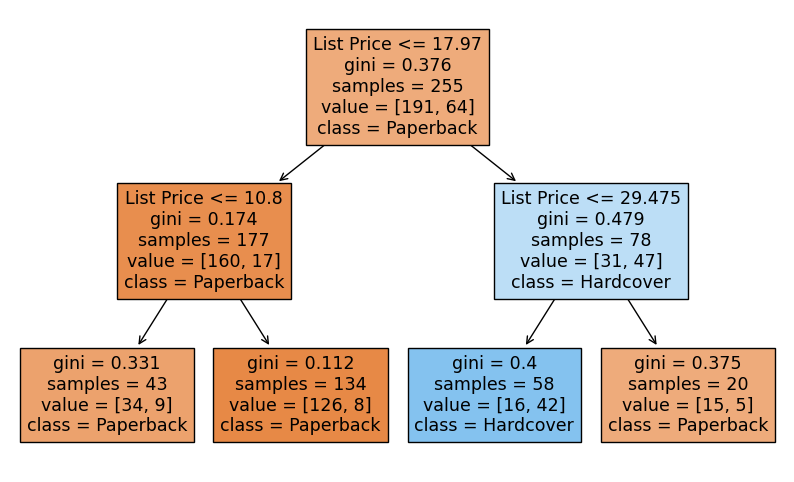

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocess the data
ab_reduced_noNaN = ab.drop(['Weight_oz', 'Width', 'Height'], axis=1)  # Remove unnecessary columns
ab_reduced_noNaN = ab_reduced_noNaN.dropna()                          # Drop rows with NaN values
ab_reduced_noNaN = ab_reduced_noNaN.astype({'Pub year': 'int', 'NumPages': 'int', 'Hard_or_Paper': 'category'})

# Prepare the data
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target variable (1 for hardcover, 0 for paperback)
X = ab_reduced_noNaN[['List Price']]                        # Feature matrix (List Price only)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=130)

# Initialize the DecisionTreeClassifier with a maximum depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=130)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()

[Text(0.5, 0.8333333333333334, 'x[0] <= 17.97\ngini = 0.376\nsamples = 255\nvalue = [191, 64]'),
 Text(0.25, 0.5, 'x[0] <= 10.8\ngini = 0.174\nsamples = 177\nvalue = [160, 17]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.331\nsamples = 43\nvalue = [34, 9]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.112\nsamples = 134\nvalue = [126, 8]'),
 Text(0.75, 0.5, 'x[0] <= 29.475\ngini = 0.479\nsamples = 78\nvalue = [31, 47]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.4\nsamples = 58\nvalue = [16, 42]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.375\nsamples = 20\nvalue = [15, 5]')]

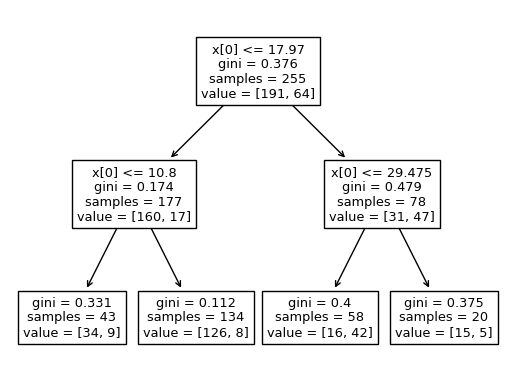

In [5]:
tree.plot_tree(clf)

In the above example, the predictions made based on the variable "List Price" is that:
    1.) if the price is less than or equal to $10.80 then it is predicted to be paperback since the majority of the sample in this range is paperback
    
    2.) if the price is greater than $10.80 and less than or equal to $17.97 then it is predicted to be paperback since the majority of the sample in this range is paperback
    
    3.) if the price is greater than $17.97 and less than or equal to $29.475 then it is predicted to be hardcover since the majority of the sample in this range is paperback
    
    4.) if the price is greater than $29.475 then it is predicted to be paperback since the majority of the sample in this range is paperback

Question 5

In the example below, the predictions made based on the features "NumPages", "Thick", and "List Price" are:

    1.)If the price is less than or equal to $17.97, if the number of pages is less than or equal to 84, and if the thickness is less than or equal to 0.25, then it is predicted to be paperback, since all of the sample in this range is paperback.
    
    2.)If the price is less than or equal to $17.97, if the number of pages is less than or equal to 84, and if the thickness is greater than 0.25, then it is predicted to be hardcover, since all of the sample in this range is hardcover.
    
    3.)If the price is less than or equal to $17.97, if the number of pages is greater than 84 and less than or equal to 348, and if the price is less than or equal to $8.085, then it is predicted to be paperback, since the majority of the sample in this range is paperback.
    
    4.)If the price is less than or equal to $17.97, if the number of pages is greater than 84 and less than or equal to 348, and if the price is greater than $8.085, then it is predicted to be paperback, since the majority of the sample in this range is paperback.
    
    5.)If the price is less than or equal to $17.97, if the number of pages is greater than 348, and if the thickness is less than or equal to 0.85, then it is predicted to be paperback, since all of the sample in this range is paperback.
    
    6.)If the price is less than or equal to $17.97, if the number of pages is greater than 348, and if the thickness is greater than 0.85, then it is predicted to be paperback, since the majority of the sample in this range is paperback.
    
    7.) If the price is greater than 17.97, if the thickness is less than or equal to 0.95, if the number of pages is less than or equal to 187.5, and if the price is less than or equal to $24, then it is predicted to be hardcover, since all of the sample in this range is hardcover.
    
    8.) If the price is greater than 17.97, if the thickness is less than or equal to 0.95, if the number of pages is less than or equal to 187.5, and if the price is greater than $24, then it is predicted to be paperback, since the majority of the sample in this range is paperback.
    
    9.) If the price is greater than 17.97, if the thickness is less than or equal to 0.95, if the number of pages is greater than 187.5, and the price is less than or equal to $19, then it is predicted to be paperback, since the majority of the sample in this range is paperback.
    
    10.) If the price is greater than 17.97, if the thickness is less than or equal to 0.95, if the number of pages is greater than 187.5, and the price is greater than $19, then it is predicted to be paperback, since the majority of the sample in this range is paperback.
    
    11.) If the price is greater than 17.97, if the thickness is greater than 0.95, if the number of pages is less than or equal to 32, and if the thickness is less than or equal to 1.05, then it is predicted to be hardcover, since the majority of the sample in this range is hardcover.
    
    12.) If the price is greater than 17.97, if the thickness is greater than 0.95, if the number of pages is less than or equal to 32, and if the thickness is greater than 1.05, then it is predicted to be hardcover, since the majority of the sample in this range is hardcover.
    
    13.) If the price is greater than 17.97, if the thickness is greater than 0.95, if the number of pages is greater than 32, and if the price is less than or equal to $4.725, then it is predicted to be paperback, since the majority of the sample in this range is paperback.
    
    14.) If the price is greater than 17.97, if the thickness is greater than 0.95, if the number of pages is greater than 32, and if the price is greater than $4.725, then it is predicted to be hardcover, since the majority of the sample in this range is hardcover.

Accuracy: 0.796875

Classification Report:
               precision    recall  f1-score   support

       False       0.77      0.98      0.86        42
        True       0.91      0.45      0.61        22

    accuracy                           0.80        64
   macro avg       0.84      0.72      0.73        64
weighted avg       0.82      0.80      0.77        64



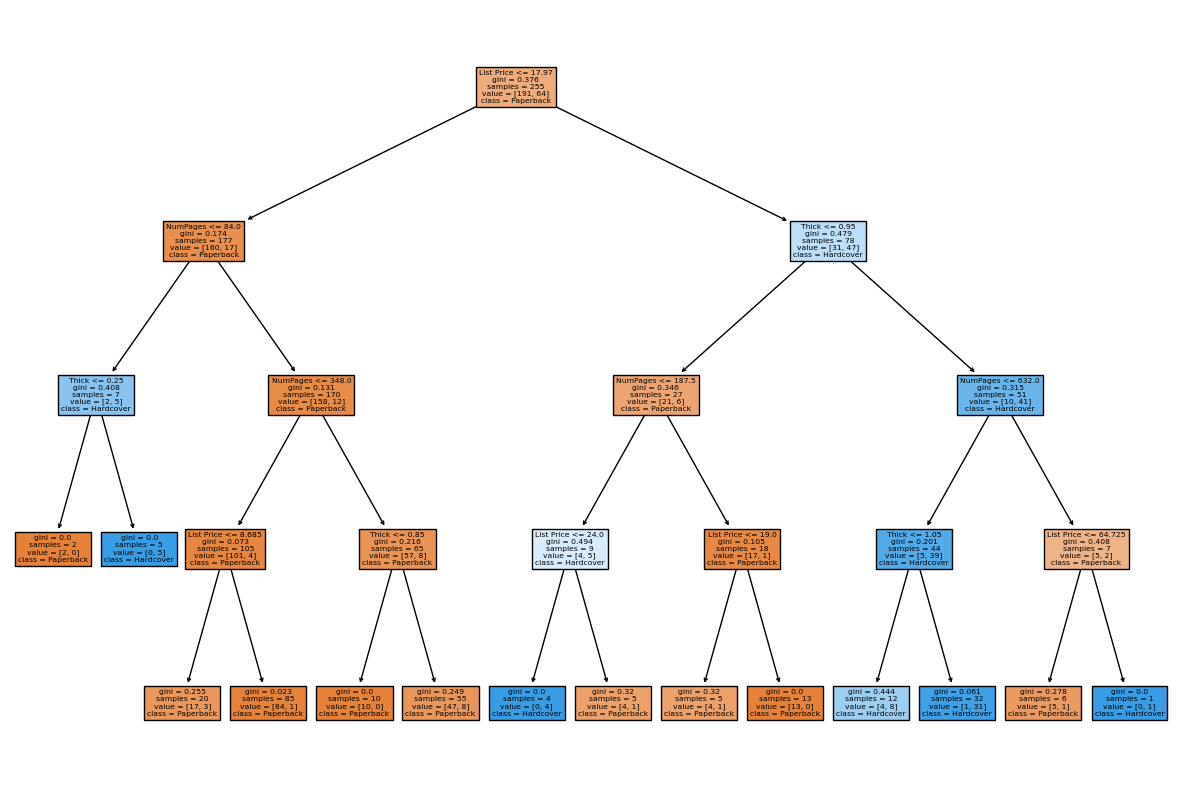

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Prepare the data
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target variable (1 for hardcover, 0 for paperback)
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]   # Feature matrix with 3 features

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=130)

# Initialize the DecisionTreeClassifier with a maximum depth of 4
clf = DecisionTreeClassifier(max_depth=4, random_state=130)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(
    clf, 
    feature_names=X.columns.tolist(),  # Feature names from X
    class_names=['Paperback', 'Hardcover'], 
    filled=True
)
plt.show()

Question 6

In the confusion matrix for clf, the sensitivity is 0.59, the specificity is 0.93, and the accuracy is 0.81.

In the confusion matrix for clf2, the sensitivity is 0.45, the specificity is 0.98, and the accuracy is 0.80.

Accuracy: 0.8125

Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.93      0.87        42
        True       0.81      0.59      0.68        22

    accuracy                           0.81        64
   macro avg       0.81      0.76      0.78        64
weighted avg       0.81      0.81      0.80        64



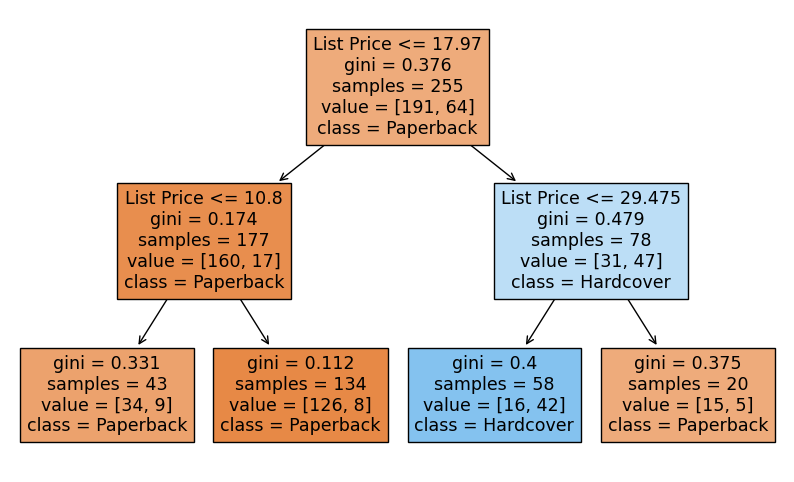

In [15]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocess the data
ab_reduced_noNaN = ab.drop(['Weight_oz', 'Width', 'Height'], axis=1)  # Remove unnecessary columns
ab_reduced_noNaN = ab_reduced_noNaN.dropna()                          # Drop rows with NaN values
ab_reduced_noNaN = ab_reduced_noNaN.astype({'Pub year': 'int', 'NumPages': 'int', 'Hard_or_Paper': 'category'})

# Prepare the data
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target variable (1 for hardcover, 0 for paperback)
X = ab_reduced_noNaN[['List Price']]                        # Feature matrix (List Price only)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=130)

# Initialize the DecisionTreeClassifier with a maximum depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=130)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()

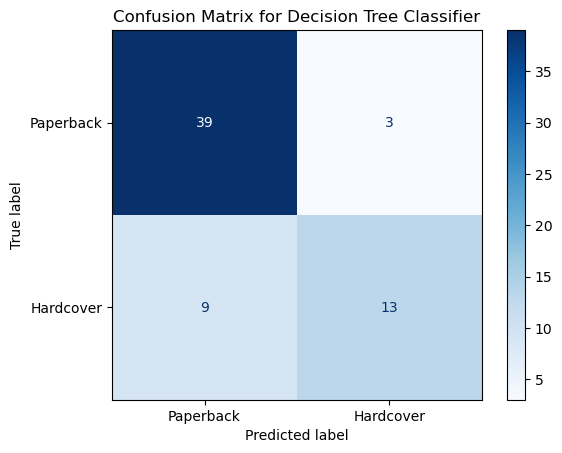

In [16]:
#clf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Labels correspond to classes: 0 (Paperback), 1 (Hardcover)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Paperback', 'Hardcover'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Assuming binary classification

# Extract values from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0  # Avoid division by zero
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0  # Avoid division by zero

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")


Accuracy: 0.81
Sensitivity (Recall): 0.59
Specificity: 0.93


Accuracy: 0.796875

Classification Report:
               precision    recall  f1-score   support

       False       0.77      0.98      0.86        42
        True       0.91      0.45      0.61        22

    accuracy                           0.80        64
   macro avg       0.84      0.72      0.73        64
weighted avg       0.82      0.80      0.77        64



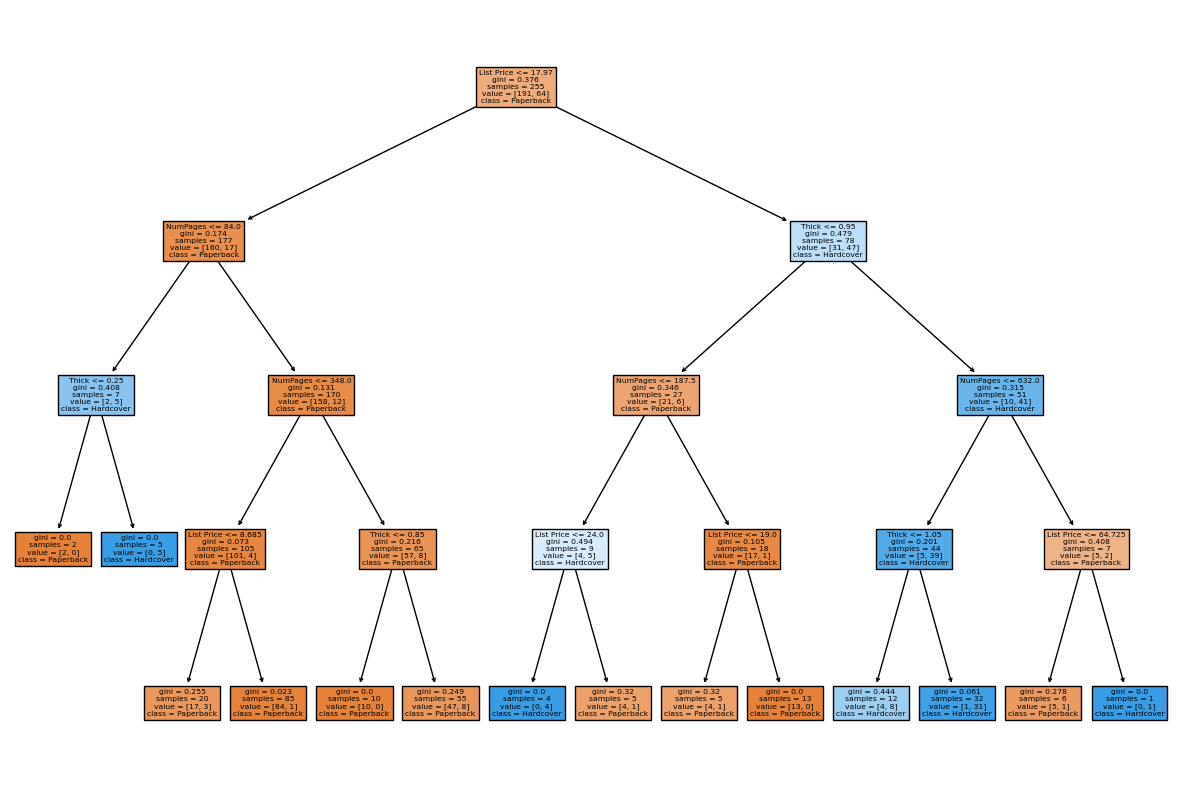

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Prepare the data
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target variable (1 for hardcover, 0 for paperback)
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]   # Feature matrix with 3 features

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=130)

# Initialize the DecisionTreeClassifier with a maximum depth of 4
clf = DecisionTreeClassifier(max_depth=4, random_state=130)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(
    clf, 
    feature_names=X.columns.tolist(),  # Feature names from X
    class_names=['Paperback', 'Hardcover'], 
    filled=True
)
plt.show()

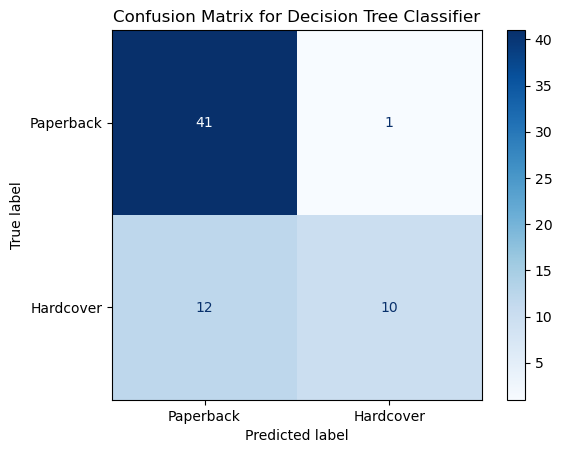

In [19]:
#clf2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Labels correspond to classes: 0 (Paperback), 1 (Hardcover)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Paperback', 'Hardcover'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Assuming binary classification

# Extract values from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0  # Avoid division by zero
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0  # Avoid division by zero

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")


Accuracy: 0.80
Sensitivity (Recall): 0.45
Specificity: 0.98


Question 7

The main reason why the difference occurs between the confusion matrix above and the one below is because the one below evaluates on the training set, while the one above evaluates on the test set. Of the two, the one above is better than the one below because it can show how well the model generalizes to unseen data. The confusion matrix may perform well on the training set, but it may not be able to predict well with new unseen data.

In [ ]:
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

Question 8

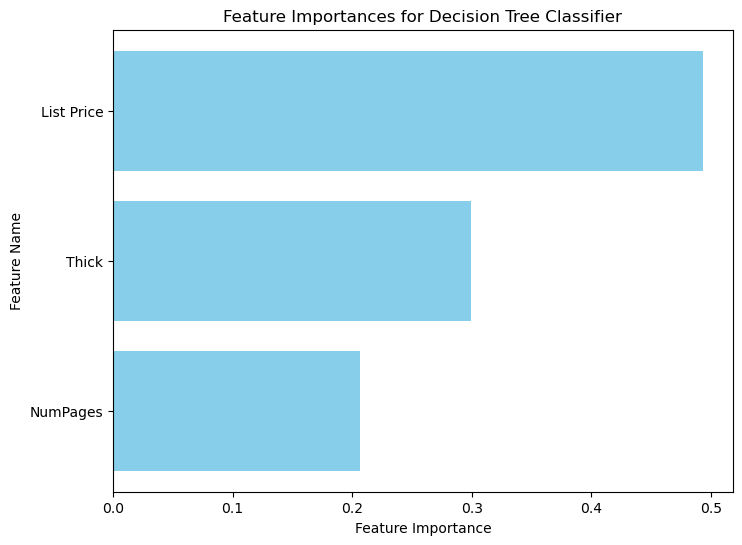

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Example dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocess the data
ab_reduced_noNaN = ab.drop(['Weight_oz', 'Width', 'Height'], axis=1)  # Remove unnecessary columns
ab_reduced_noNaN = ab_reduced_noNaN.dropna()                          # Drop rows with NaN values
ab_reduced_noNaN = ab_reduced_noNaN.astype({'Pub year': 'int', 'NumPages': 'int', 'Hard_or_Paper': 'category'})

# Prepare the data
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target variable
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]   # Feature matrix with multiple features

# Train the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=130)
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(X.columns, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importances for Decision Tree Classifier")
plt.show()

Question 9

Linear regression coefficients quantify the relationship between each predictor variable and the response variable.
Specifically, a coefficient represents the expected change in the response variable for a one-unit change in the predictor variable, holding all other predictors constant. On the other hand, feature importance in decision trees measures the relative contribution of each predictor to the overall predictive performance of the tree. It's based on how much splitting on a feature improves the chosen criteria across all the splits where that feature is used.

Question 10

Yes

Certainly! Here’s a summary of our interactions starting from the question about classification decision trees:

---

### **Initial Prompt**
You asked about the type of problem a **Classification Decision Tree** addresses and examples of its real-world applications. I explained that it solves **categorical classification problems** by recursively splitting data based on features to maximize separation of target classes. Applications include:
- Medical diagnosis (e.g., predicting if a tumor is benign or malignant).
- Spam email detection.
- Customer churn prediction.

---

### **Follow-up Discussions**
1. **Gini Impurity and Decision Making**  
   - You asked about **Gini impurity** and how decisions are made in classification decision trees.
   - I explained that Gini impurity measures how "pure" a node is, with a lower Gini implying higher purity. At each split, the tree chooses the feature and threshold that minimize impurity.

2. **Interpreting Predictions**  
   - You asked how predictions are made for trees with features like `'NumPages'`, `'Thick'`, and `'List Price'`.  
   - I explained that the tree splits data based on rules for these features and assigns the class most frequent in the terminal node to new data points.

3. **Confusion Matrix and Metrics**  
   - You asked about creating and interpreting a **confusion matrix** for evaluating tree predictions.  
   - I provided code examples and clarified how confusion matrices display true positives, false positives, true negatives, and false negatives. I also explained how to compute **accuracy, sensitivity, and specificity**.

4. **Feature Importance**  
   - You inquired about how to visualize and interpret **feature importance** in decision trees.  
   - I explained the `.feature_importances_` attribute, how it reflects the relative contribution of each feature, and provided Python code to plot feature importances using `matplotlib`.

5. **Comparison with Linear Regression**  
   - You asked how interpreting coefficients in **linear regression** differs from **feature importance** in decision trees.  
   - I explained that regression coefficients explicitly represent the linear relationship between predictors and the target, while feature importance in trees indicates the overall contribution of predictors without providing directionality or unit-based effects.

---

### **Main Takeaways**
- Classification decision trees handle categorical target variables and are especially powerful for datasets with non-linear relationships or interactions between features.
- Gini impurity and entropy are central to how decision trees split data at each node.
- Confusion matrices and related metrics (accuracy, sensitivity, specificity) help evaluate tree performance.
- Feature importance provides a heuristic for understanding which features most influence tree-based models.
- Decision trees and linear regression differ fundamentally in their assumptions, interpretability, and relationships with predictors.

---

Let me know if you’d like me to elaborate on or revisit any part of the discussion! 😊

https://chatgpt.com/share/673ff5f6-de74-8011-a732-788ccb70f6f1